# Car Price Prediction

In [123]:
!pip install word2number

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from word2number import w2n



## Preprocessing Data 

In [97]:
data = pd.read_csv('CarPrice_Assignment.csv')
print(data.columns)
print(data.shape)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')
(205, 26)


Checking the type of data present present in each column

In [ ]:

for col in data.columns:
  print(col,'--', data[col].unique(),'\n')


Correlation matrix shows how related each features are dependent on each other. We can see that price is proportional to some features like curbweight, enginesize, horsepower. 

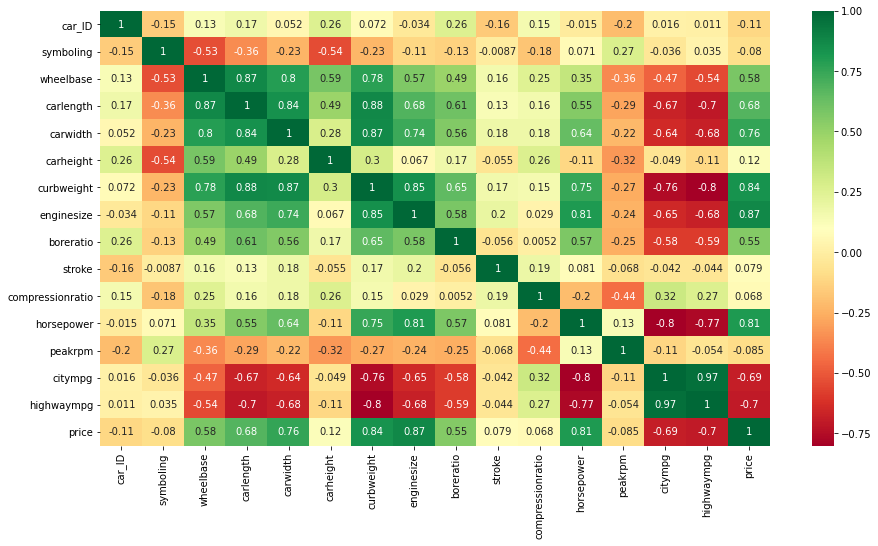

In [101]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [147]:
#split data into X and y
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

Cylinder number is given in words this should be can
 into integers

In [141]:
index_no = data.columns.get_loc('cylindernumber')

for i in range(X.shape[0]):
  X[i,index_no] = w2n.word_to_num(X[i,index_no]) 

Some features had string data with many unique values, they are LabelEncoded to change into numbers

In [142]:
from sklearn.preprocessing import LabelEncoder
ctl = LabelEncoder()
for col in ['CarName', 'carbody','enginetype', 'fuelsystem'] :
  index_no = data.columns.get_loc(col) 
  X[:,index_no]=np.array(ctl.fit_transform(X[:,index_no]))


Features having few unique values can be turned to OneHot vectors using OneHotEncoding

In [143]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
cto = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3,4,5,7,8])], remainder='passthrough')
X = np.array(cto.fit_transform(X))

In [144]:
#split the encoded data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

Standardize the data as the values are in different ranges. OneHot encoded features are avoided.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 11:] = sc.fit_transform(X_train[:, 11:])
X_test[:, 11:] = sc.transform(X_test[:, 11:])

## Training Model
RandomForest regressor is used 

In [146]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators = 45,random_state = 0, max_depth=6, min_samples_split=2, max_leaf_nodes=35)
clf.fit(X_train, y_train)
train_acc = clf.score(X_train,y_train)
test_acc = clf.score(X_test,y_test)
print('Train Accuracy :',train_acc,'\n','Test Accuracy : ',test_acc)

Train Accuracy : 0.9881303082374199 
 Test Accuracy :  0.9157088762534047


In [ ]:
y_pred = clf.predict(X_test)
X_test[:,11:] = sc.inverse_transform(X_test[:,11:])

In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [71]:
y_trainpred = clf.predict(X_train)
X_train[:,11:] = sc.inverse_transform(X_train[:,11:])

In [ ]:

plt.figure(figsize=(15,8))
plt.title('Random Forest on Train Data - enginesize vs price')
plt.xlabel('enginesize')
plt.ylabel('Price')
plt.scatter(X_train[:,-9],y_train, color='red')
plt.scatter(X_train[:,-9],y_trainpred,color='blue')
plt.legend(["actual","prediction"])
plt.show()

In [ ]:

plt.figure(figsize=(15,8))
plt.title('Random Forest on Test Data - enginesize vs price')
plt.xlabel('enginesize')
plt.ylabel('Price')
plt.scatter(X_test[:,-9],y_test, color='red')
plt.scatter(X_test[:,-9],y_pred,color='blue')
plt.legend(["actual","prediction"])
plt.show()

##Predicting on custom data


In [ ]:
x =  np.array(x)  #input array of shape (-1,25)
x.shape

In [132]:
for i in range(x.shape[0]):
  x[i,15] = w2n.word_to_num(x[i,15])

In [133]:
for index_no in [2,6,14,17]:
  x[:,index_no]=np.array(ctl.fit_transform(x[:,index_no]))

In [134]:
x = np.array(cto.transform(x))

In [ ]:

x[:, 11:] = sc.transform(x[:, 11:])

In [ ]:
yc_pred = clf.predict(x)
print(yc_pred)